<a href="https://colab.research.google.com/github/AnushaAnanthan/driver_drowsy_detection/blob/main/driver_drowsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.2 MB/s eta 0:16:16tcmalloc: large alloc 1147494400 bytes == 0x558f80222000 @  0x7f8bde261615 0x558f7cdd94cc 0x558f7ceb947a 0x558f7cddc2ed 0x558f7cecde1d 0x558f7ce4fe99 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4fd00 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4c737 0x558f7cecec66 0x558f7ce4bdaf 0x558f7cecec66 0x558f7ce4bdaf 0x558f7cecec66 0x558f7ce4bdaf 0x558f7cdde039 0x558f7ce21409 0x558f7cddcc52 0x558f7ce4fc25 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4c737 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4b915 0x558f7cdddafa 0x558f7ce4bc0d 0x558f7ce4a9ee
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:54tcmalloc: large alloc 1434370048 bytes == 0x558fc4878000 @  0x7f8bde261615 0x558f7cdd94cc 0x558f7ceb947a 0x558f7cddc2ed 0x558f7cecde1d 0x558f7ce4fe99 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4fd00 0x558f7ce4a9ee 0x558f7cdddbda 0x558f7ce4c737 0x558f7cecec66 0x558f7

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10245, done.
remote: Total 10245 (delta 0), reused 0 (delta 0), pack-reused 10245
Receiving objects: 100% (10245/10245), 10.45 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (7108/7108), done.


In [ ]:
!cd yolov5 & pip install -r /content/yolov5/requirements.txt

     |████████████████████████████████| 596 kB 8.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-12-4 torch 1.8.1+cu111 CPU

Fusing layers... 



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

3. Make Detections with Images

In [ ]:
img ='https://ultralytics.com/images/zidane.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 217.0ms pre-process, 268.4ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


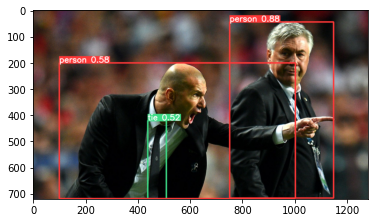

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

4. Real Time Detections

In [ ]:
#cap = cv2.VideoCapture(0)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
results = model('photo.jpg')
results.print()

image 1/1: 480x640 1 person, 1 banana, 1 cell phone
Speed: 17.7ms pre-process, 394.3ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)


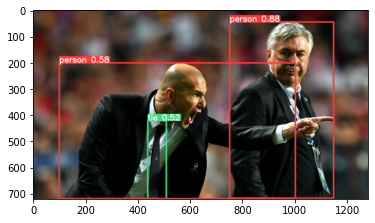

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#capture = cv2.VideoCapture(0)
#while 'photo.jpg'.isOpened():
    #ret, frame = capture.read()
    
    # Make detections 
   # results = model(frame)
    
   # cv2.imshow('YOLO', np.squeeze(results.render()))
    
    #if cv2.waitKey(10) & 0xFF == ord('q'):
     #   break
#cap.release()
#cv2.destroyAllWindows()

5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


In [ ]:
#cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

error: ignored

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.6e58c030-54ce-11ec-a5d1-0242ac1c0002.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data/images/awake.7113156e-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/awake.711329c8-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/awake.71133fa8-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/awake.711360be-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/awake.711381f2-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/drowsy.7113e5fc-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/drowsy.7113e9d0-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/drowsy.7113ed7c-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/drowsy.7113f07e-54ce-11ec-a5d1-0242ac1c0002.jpg
data/images/drowsy.7113f34e-54ce-11ec-a5d1-0242ac1c0002.jpg


In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 1923, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 1923 (delta 77), reused 100 (delta 43), pack-reused 1760
Receiving objects: 100% (1923/1923), 232.85 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (1124/1124), done.


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     |████████████████████████████████| 8.3 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 25.8 MB/s 
     |████████████████████████████████| 317 kB 66.5 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "train.py", line 626, in <module>
    main(opt)
  File "train.py", line 503, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 359, in check_file
    assert len(files), f'File not found: {file}'  # assert file was fo

6. Load Custom Model

In [ ]:

model = torch.hub.load('https://pytorch.org/hub/ultralytics_yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

ValueError: ignored

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

FileNotFoundError: ignored

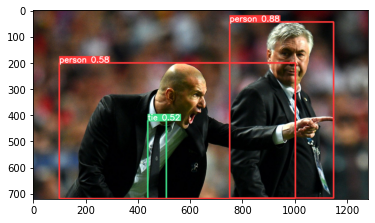

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()